# Projectile Motion Assignment: Due 9/24

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

Code the equations into a function 

In [283]:
#define projectile motion function in vaccum
#def proj_vac
import matplotlib.pyplot as mpl
import numpy as np
from scipy import integrate
import scipy as sci
import math
vo=300
angle=50
g=-10
mass=7.8*((4/3) * np.pi * (15/2)**3)/1000
# define function for velocity without drag
initialv=[0,0,vo*math.cos(angle*math.pi/180),vo*math.sin(angle*math.pi/180)]
def proj_vac(time, vals):
    x,y,vx,vy = vals
    xdot = vx
    ydot = vy
    vxdot =0
    vydot= mass*g
    return np.array([xdot,ydot,vxdot,vydot])

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [295]:
#code

sol= integrate.solve_ivp(proj_vac,(0,3.5),initialv, method='RK45',t_eval =np.linspace(0,3.5,10000) )

xt= []
yt=sol.y[1][sol.y[1]>=0]
for i in range(len(yt)):
    xt.insert(i,sol.y[0][i])
print(len(yt),len(xt))
print(yt)
print(xt[-1],"x at 3.5s")
print(yt[-1],"y at 3.5s")

9527 9527
[0.         0.08043427 0.16085164 ... 0.18935575 0.10894436 0.02851608]
642.9997508118497 x at 3.5s
0.028516082824069144 y at 3.5s


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

range in x 642.9997508118497 m


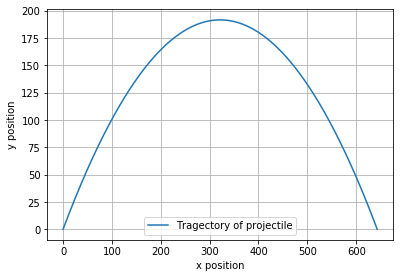

In [299]:
#codes


fig = mpl.figure("tragectory")
ax = fig.add_axes([0.8,0.8,0.8,0.8])
ax.plot(xt,yt, label="Tragectory of projectile")
ax.legend(loc='best')
ax.set_xlabel("x position")
ax.set_ylabel('y position')
ax.grid();

# horizontal range is last value in xrk45
print("range in x",xt[-1],'m')

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [309]:
#codes
def customrk4(condition,tmin,tmax,counts):
    tarr=np.linspace(tmin,tmax,counts)
    x = np.zeros((len(tarr),len(condition)))
    x[0] = condition
    for i in range(len(tarr)-1):
        k1=proj_vac((tarr[i+1]-tarr[i]),x[i]) 
        k2 =proj_vac(tarr[i]+(tarr[i+1]-tarr[i])/2.0, x[i] + ((tarr[i+1]-tarr[i])/2.0) *k1)
        k3 = proj_vac(tarr[i]+(tarr[i+1]-tarr[i])/2.0, x[i] + ((tarr[i+1]-tarr[i])/2.0)*k2 )
        k4 = proj_vac(tarr[i]+(tarr[i+1]-tarr[i]), x[i] + (tarr[i+1]-tarr[i])*k3)
        x[i+1] = x[i] + (tarr[i+1]-tarr[i])/6*(k1 + (2*k2) + (2*k3) + k4)
    return x
customrk4(initialv,0,3.5,100) 

#looking at the data below, the last positve y value gives an x range of 640m, roughly 2m off of scipy's code.

array([[   0.        ,    0.        ,  192.83628291,  229.81333294],
       [   6.81744435,    8.03857422,  192.83628291,  224.94029433],
       [  13.63488869,   15.9048693 ,  192.83628291,  220.06725573],
       [  20.45233304,   23.59888523,  192.83628291,  215.19421712],
       [  27.26977738,   31.12062202,  192.83628291,  210.32117852],
       [  34.08722173,   38.47007967,  192.83628291,  205.44813991],
       [  40.90466607,   45.64725818,  192.83628291,  200.57510131],
       [  47.72211042,   52.65215754,  192.83628291,  195.7020627 ],
       [  54.53955476,   59.48477776,  192.83628291,  190.8290241 ],
       [  61.35699911,   66.14511884,  192.83628291,  185.95598549],
       [  68.17444345,   72.63318078,  192.83628291,  181.08294689],
       [  74.9918878 ,   78.94896357,  192.83628291,  176.20990828],
       [  81.80933214,   85.09246722,  192.83628291,  171.33686968],
       [  88.62677649,   91.06369173,  192.83628291,  166.46383107],
       [  95.44422083,   96.862637

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [260]:
drag = lambda y, magv: (0.25 * (15**2)/(100**2) * np.exp(-y / 10000))*magv**2
dragx = lambda magv: ((0.25 * (15**2))/(100**2))*magv**2
def proj_drag(tim, valss):
    x, y, vxdrag, vydrag = valss
    xdot = vxdrag 
    ydot = vydrag
    vxdot = -dragx(xdot)
    vydot = -mass* 9.8 - dragx(ydot)
    if y < 0:
        return np.zeros(4)
    return np.array([xdot, ydot, vxdot, vydot])

In [266]:
#code
solvedv= integrate.solve_ivp(proj_drag,(0,3.5),initialv, method='RK45',t_eval = np.linspace(0,3.5,1000))

xt_drag=[]
yt_drag=solvedv.y[1][solvedv.y[1]>=0]
for i in range(len(yt_drag)):
    xt_drag.insert(i,solvedv.y[0][i])
    
#print(xt_drag)
#print(yt_drag)

In [249]:
#codes


Plot the ball's trajecory and find it's horizontal range

horizontal range = 219.27524794316693 m


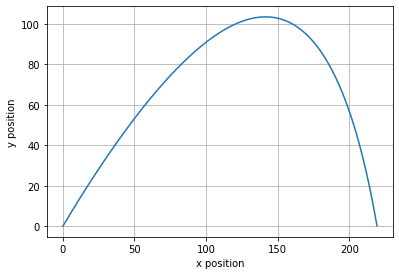

In [267]:
#codes
fig2 = mpl.figure("tragectory")
axeses = fig2.add_axes([0.8,0.8,0.8,0.8])
axeses.plot(xt_drag,yt_drag, label="Tragectory of projectile with drag")
axeses.set_xlabel("x position")
axeses.set_ylabel('y position')
axeses.grid()
print('horizontal range =', xt_drag[-1],'m')

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [270]:
#code
def proj_drag2(t, vals):
    x,y,vx2,vy2 = vals
    xdot = vx2
    ydot = vy2
    vxdot = - drag(x,vx2)
    vydot = -mass * 9.8 - drag(y,vy2)
    if y<0:
        return np.zeros(4)
    return np.array([xdot,ydot,vxdot,vydot])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [276]:
#codes
solvedv2= integrate.solve_ivp(proj_drag2,(0,3.5),initialv, method='RK45',t_eval = np.linspace(0,3.5,10000))

xtd2= []
ytd2=solvedv2.y[1][solvedv2.y[1]>=0]
for i in range(len(ytd2)):
    xtd2.insert(i,solvedv2.y[0][i])
print(ytd2)

[0.         0.08041624 0.16077959 ... 0.16624728 0.08586958 0.00543895]


Plot the ball's trajectory and find it's horizontal range

horizontal range = 220.24431265834718 m


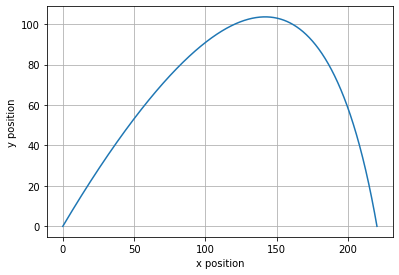

In [278]:
#codes
fig3 = mpl.figure("tragectory")
axus = fig3.add_axes([0.8,0.8,0.8,0.8])
axus.plot(xtd2,ytd2, label="Tragectory of projectile with drag as function of y")
axus.set_xlabel("x position")
axus.set_ylabel('y position')
axus.grid()
print('horizontal range =', xtd2[-1],'m')

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

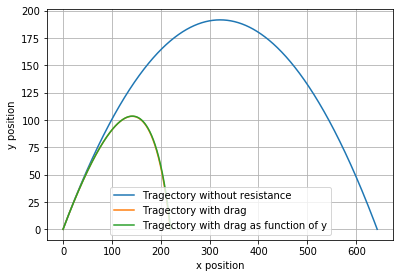

In [300]:
#codes
fig4 = mpl.figure("tragectory")
axas = fig4.add_axes([0.8,0.8,0.8,0.8])
axas.plot(xt,yt, label="Tragectory without resistance")
axas.plot(xt_drag,yt_drag, label="Tragectory with drag")
axas.plot(xtd2,ytd2, label="Tragectory with drag as function of y")
axas.set_xlabel("x position")
axas.set_ylabel('y position')
axas.legend()
axas.grid()
#in the graph below, the green and orange lines overlap.

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)

In [ ]:
#c(0) because the drag force is less at higher atmospheres using c(y)